In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Probability

In [26]:
from itertools import product

head = [False, True]
flips = list(product(head, repeat=6))
outcomes = Table(['1st', '2nd', '3rd', '4th', '5th', '6th']).with_rows(flips)
outcomes

1st,2nd,3rd,4th,5th,6th
False,False,False,False,False,False
False,False,False,False,False,True
False,False,False,False,True,False
False,False,False,False,True,True
False,False,False,True,False,False
False,False,False,True,False,True
False,False,False,True,True,False
False,False,False,True,True,True
False,False,True,False,False,False
False,False,True,False,False,True


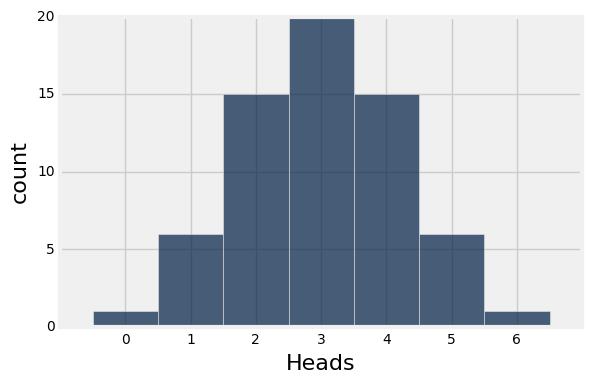

In [27]:
outcomes.with_column('Heads', outcomes.apply(sum)).group('Heads').bar('Heads')

In [31]:
(79/80) ** 79

0.3701955889084742

In [32]:
1/80

0.0125

In [36]:
1 - ((1/3) * 1 + (2/3) * (1/2)) ** 10

0.9826584700841674

## Estimation

In [119]:
start = 8
end = 1868

In [120]:
observed = np.random.choice(np.arange(start, end), 50)

In [125]:
max(observed) - min(observed) + 1

1658

Bias: -71.9136
Avg. absolute error: 71.9136


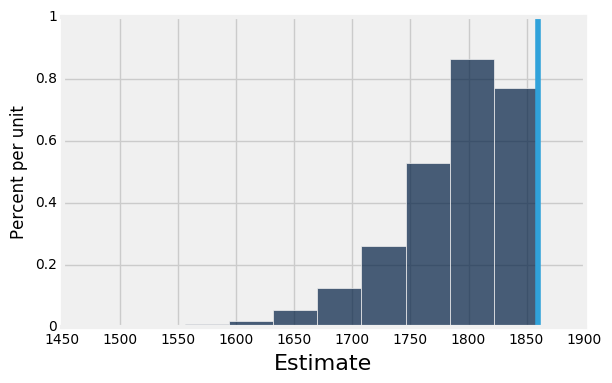

In [122]:
def guess(observed):
    return max(observed) - min(observed) + 1

guesses = make_array()
for i in np.arange(5000):
    obs = np.random.choice(np.arange(start, end), 50)
    guesses = np.append(guesses, guess(obs))
Table().with_column('Estimate', guesses).hist()
plots.plot([end-start, end-start], [0, .01])

print('Bias:', np.average(guesses - (end-start)))
print('Avg. absolute error:', np.average(np.abs(guesses - (end-start))))

Bias: -0.782016
Avg. absolute error: 40.363584


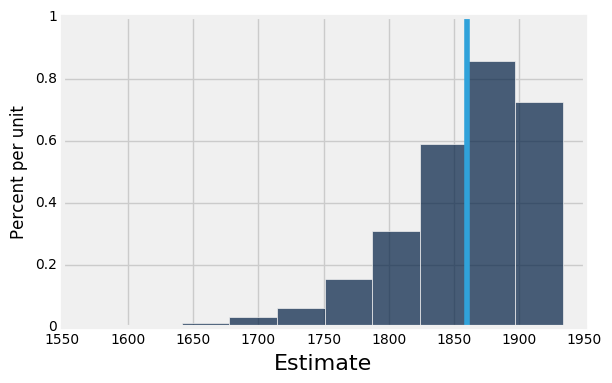

In [123]:
def guess(observed):
    return (max(observed) - min(observed)) * 52/50

guesses = make_array()
for i in np.arange(5000):
    obs = np.random.choice(np.arange(start, end), 50)
    guesses = np.append(guesses, guess(obs))
Table().with_column('Estimate', guesses).hist()
plots.plot([end-start, end-start], [0, .01])

print('Bias:', np.average(guesses - (end-start)))
print('Avg. absolute error:', np.average(np.abs(guesses - (end-start))))

In [143]:
coins = [1, 2, 3]
picked = np.random.choice(coins, 10)
print(picked)
print(picked != 3)
fair = sum(picked != 3)
print(fair)
flips = np.random.choice([False, True], fair)
print(flips)
tails = sum(flips)
print(tails)

[1 3 1 2 2 3 3 1 1 3]
[ True False  True  True  True False False  True  True False]
6
[ True  True False False  True False]
3


In [132]:
at_least_one_tail = 0
trials = 10000
coins = [1, 2, 3]

for i in np.arange(trials):
    picked = np.random.choice(coins, 10)
    fair = sum(picked != 3)
    flips = np.random.choice([False, True], fair)
    tails = sum(flips)
    if tails > 0:
        at_least_one_tail = at_least_one_tail + 1

at_least_one_tail / trials
    

0.9825